# Hand-written Digit Classification Using Inner Products


## Overview
This task illustrates how to use inner products for classifying handwritten digits. We focus on just the two digits "0" and "1" although the principles generalize to all digits.

The angle $\theta$ between two nonzero vectors $\mathbf{x}, \mathbf{y} \in \mathbf{R}^N$ is defined by $$\mathrm{cos}\,\theta = \frac{\langle \mathbf{x}, \mathbf{y} \rangle}{||\mathbf{x}|| \; ||\mathbf{y}||} \implies \theta \in [0, \pi].$$ (Here we focus on real vectors $\mathbf{x}$ and $\mathbf{y}$, but this result generalizes; c.f. slide 1.52 in c-01-matrix.pdf.)

We can use $\theta$ as a measure of "closeness" between two vectors; the closer $\theta$ is to 0, the closer the two vectors are. (Clearly, this is not always true, but if the vectors are assumed to be the same length then it is true.) The goal of this task is to use $\theta$ to determine whether an input digit is a 0 or a 1.

In [3]:
using Plots
using MIRT: jim 
using LinearAlgebra: norm

In [4]:
# Read the MNIST data file for 0 and 1 digits
# Download from web if needed
file0 = "data0"
file1 = "data1"
if !isfile(file0)
    download("http://cis.jhu.edu/~sachin/digit/data0", file0)
end
if !isfile(file1)
    download("http://cis.jhu.edu/~sachin/digit/data1", file1)
end

nx = 28 # Original image size
ny = 28
nrep = 1000

x0 = Array{UInt8}(undef, (nx,ny,nrep))
read!(file0, x0)

x1 = Array{UInt8}(undef, (nx,ny,nrep))
read!(file1, x1)

iy = 2:ny
x0 = x0[:,iy,:] # Make images non-square to help debug
x1 = x1[:,iy,:]
ny = length(iy)

# Convert images to Float64 to avoid overflow errors
x0 = Array{Float64}(x0)
x1 = Array{Float64}(x1)

display(size(x0))

(28, 27, 1000)

In [5]:
# Function to display mosaic of multiple images
imshow3 = (x) -> begin
    tmp = permutedims(x, [1, 3, 2])
    tmp = reshape(tmp, :, ny)
    heatmap(1:size(tmp,1), 1:ny, transpose(tmp),
        xtick=[1,nx], ytick=[1,ny], yflip=true,
        color=:grays, aspect_ratio=1)
end

#5 (generic function with 1 method)

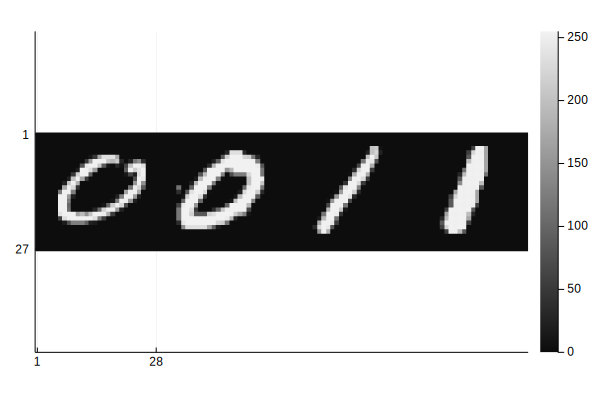

In [6]:
# Look at a couple of the images
imshow3(cat(x0[:,:,50:51], x1[:,:,601:602], dims = 3))

In [7]:
# Use some data for training, and some for testing
ntrain = 100
ntest = nrep - ntrain
train0 = x0[:,:,1:ntrain] # Training data
train1 = x1[:,:,1:ntrain]
test0 = x0[:,:,(ntrain+1):end] # Testing data
test1 = x1[:,:,(ntrain+1):end];

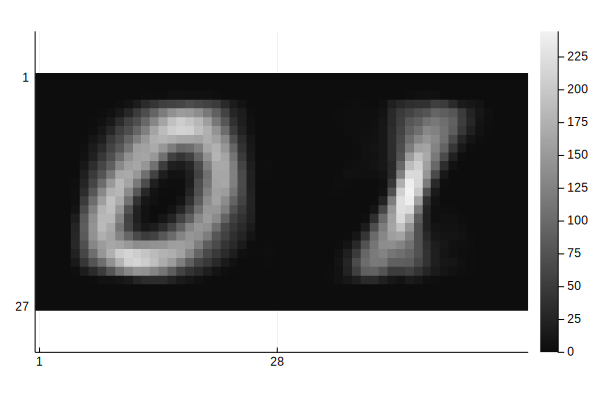

In [8]:
# Look at mean image from each class just to get a sense of things
using Statistics: mean

mean0 = mean(train0, dims = 3)
mean1 = mean(train1, dims = 3)

imshow3(cat(mean0, mean1, dims = 3))

## Task 1
Using the equation given in the overview, classify all the test data and calculate the percentage of correctly classified digits. Report your percentages in your Google Document and comment on how well (or poorly) it does.

In [9]:
# Write a function to classify all the test data
# You need to figure out what the inputs this function should be!
# Have the one output be the classification (0 or 1) for a single test sample
using LinearAlgebra
function classify(test)
    theta0=zeros(Float64, ntrain)
    theta1=zeros(Float64, ntrain)
    for i=1:ntrain
        theta0[i]=acos(dot(vec(test)',vec(train0[:,:,i]))/(norm(vec(test)*norm(vec(train0[:,:,i])))))
        theta1[i]=acos(dot(vec(test)',vec(train1[:,:,i]))/(norm(vec(test)*norm(vec(train1[:,:,i])))))
        end 
    if minimum(theta0)>minimum(theta1)
        return 1
    else
        return 0
    end
end

classify (generic function with 1 method)

In [10]:
# Calculate the percentage of correctly classified digits

# you need to fill in the arguments to classify based on your definition
correct0 = [classify(test0[:,:,n]) == 0 for n = 1:ntest]
correct1 = [classify(test1[:,:,n]) == 1 for n = 1:ntest]

# Display your results
display("Percent 0 correct = $(sum(correct0)*100 / ntest)")
display("Percent 1 correct = $(sum(correct1)*100 / ntest)")

"Percent 0 correct = 99.88888888888889"

"Percent 1 correct = 99.88888888888889"

## Task 2
Find the digits that were misclassified. In your Google Document, display a few of these digits and include the indexes. Comment on why you think these digits were misclassified.

In [11]:
# Find the indexes of the misclassified digits
incorrect0 = findall(x -> !x, correct0)
incorrect1 = findall(x -> !x, correct1)
@show(incorrect0, incorrect1);

incorrect0 = [43]
incorrect1 = [673]


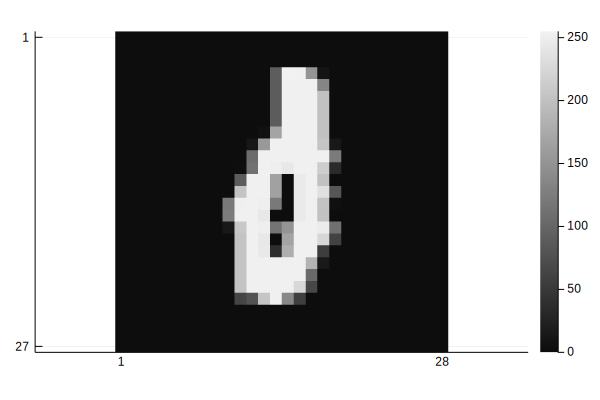

In [12]:
# Display the incorrectly classified digits
# write your code here - you can use either jim or imshow3
imshow3(cat(test0[:,:,43],dims = 3))

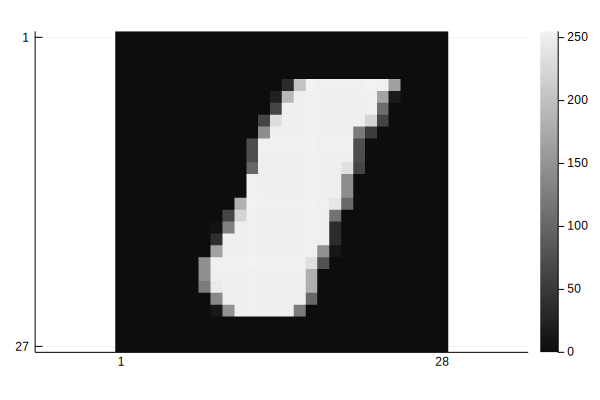

In [13]:
imshow3(cat(test1[:,:,673],dims = 3))

## Task 3
Similar to task 1, classify all the test data  and calculate the percentage of correctly classified digits. 
However, instead of the equation given in the overview, use the 
vector 2-norm to define how close to vectors are, e.g., 
$ \text{dist}(x, y) = \|x-y\|_2 $. 
As before, classify a test digit as a 0 if the training signal it is "closest" to is a zero and 
    classify a test digit as a 1 if the training signal it is "closest" to is a one. 

Report your percentages in your Google Document and comment on how well (or poorly) it does.

In [14]:
# you need to define a new classify function 
# You need to figure out what the inputs this function should be!
# have it output the classification (0 or 1) for a single test sample
function classify_nn(test)
    theta0=zeros(Float64, ntrain)
    theta1=zeros(Float64, ntrain)
    for i=1:ntrain
        theta0[i]=norm(vec(test)-vec(train0[:,:,0]))
        theta1[i]=norm(vec(test)-vec(train1[:,:,0]))
    end
    if minimum(theta0)>minimum(theta1)
        return 1
    else
        return 0
    end
end

classify_nn (generic function with 1 method)

In [15]:
# Calculate the percentage of correctly classified digits

# you need to fill in the arguments to classify() based on your definition
correct0_nn = [classify(test0[:,:,n]) == 0 for n = 1:ntest]
correct1_nn = [classify(test1[:,:,n]) == 1 for n = 1:ntest]

# Uncomment these lines to display your results
display("Percent 0 correct = $(sum(correct0_nn)*100 / ntest)")
display("Percent 1 correct = $(sum(correct1_nn)*100 / ntest)")

"Percent 0 correct = 99.88888888888889"

"Percent 1 correct = 99.88888888888889"

## Optional Tasks
- Extend this notebook to handle 3 digits (or all 10).
- These images are $28 \times 27$ and it is hard to visualize vectors in $\mathbf{R}^{756}$. Think about how to make a 2D picture that shows the test data as a colored scatter plot with a dividing line separating (hopefully) the two classes.